In [4]:
import numpy as np

In [5]:
class LogisticRegression:

    def __init__(self, max_iter=1500, learning_rate=0.001, penalty="l2", random_state=42, l1_ration=None, decision_boundary=0.5, batch_size=64, tol=1e-6) -> None:
        

        np.random.seed(random_state)
        self.coefs_ = np.zeros(0)
        self.max_iter = max_iter
        self.penalty = penalty
        self.learning_rate = learning_rate
        self.decision_boundary = decision_boundary
        self.batch_size = batch_size
        self.tol = tol
        self.loss = np.zeros(shape=(max_iter))

    
    def batch_generator(self, X, y):

        m, _ = X.shape
        indices = np.arange(m)
        np.random.shuffle(indices)

        for begin in np.arange(0, m, self.batch_size):

            end = min(begin + self.batch_size, m)
            batch = indices[begin : end]
            yield X[batch], y[batch]
    

    def predict(self, X):

        m, _ = X.shape
        X = np.hstack((np.ones((m, 1)), X))

        return np.where(self.activation(np.dot(X, self.coefs_)) > self.decision_boundary, 1, 0)
    

    def activation(self, z):

        return 1 / (1 + np.exp(-z))


    def fit(self, X, y):

        m, n = X.shape

        if y.ndim == 1:

            self.coefs_ = np.random.uniform(-0.5, 0.5, size=n + 1)
        
        else:

            self.coefs_ = np.random.uniform(-0.5, 0.5, size=(n + 1, 1))
        
        X = np.hstack((np.ones((m, 1)), X))

        for iter in np.arange(self.max_iter):

            loss = 0

            for x_batch, y_batch in self.batch_generator(X, y):

                pred = self.activation(np.dot(x_batch, self.coefs_))
                loss += -(y_batch * np.log(pred) + (1 - y_batch) * np.log(1 - pred)).sum() / x_batch.shape[0]
                self.coefs_ -= self.learning_rate * np.dot(x_batch.T, (pred - y_batch)) / x_batch.shape[0]
            
            self.loss[iter] = (loss / m // self.batch_size)
            if self.loss[iter] < self.tol:
                break
            print(f"{iter}/{self.max_iter} -- loss {self.loss[iter]:.2f}")

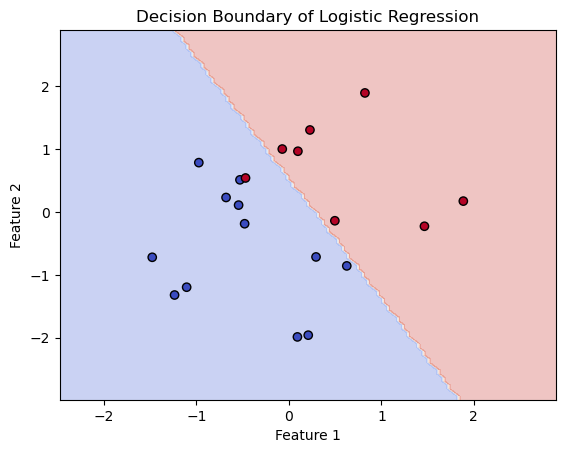

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Create a synthetic dataset
np.random.seed(42)
X = np.random.randn(100, 2)  # 100 samples with 2 features
y = (X[:, 0] + X[:, 1] > 0).astype(int)  # Simple linear decision boundary

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the LogisticRegression model
model = LogisticRegression(max_iter=2000, learning_rate=0.01, random_state=42)
model.fit(X_train, y_train)

# Plotting the decision boundary
def plot_decision_boundary(model, X, y):
    # Create a mesh grid for plotting
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Predict the class for each point in the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', cmap='coolwarm')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary of Logistic Regression')
    plt.show()

# Plot the decision boundary using the training data
plot_decision_boundary(model, X_test, y_test)
